In [1]:
import pandas as pd
import random
import numpy as np
import pprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Outcome', ylabel='count'>

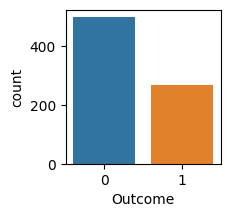

In [ ]:
f, ax = plt.subplots(figsize=(2, 2))
sns.countplot(df, x="Outcome", ax=ax)

<Axes: >

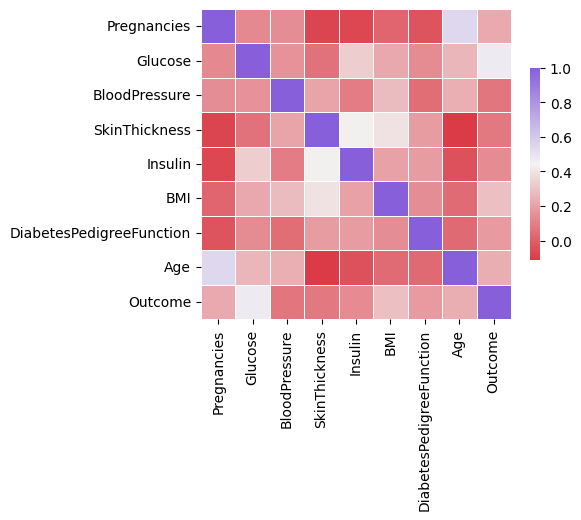

In [ ]:
#Correlation matrix
corr = df.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.diverging_palette(10, 275, as_cmap=True)

sns.heatmap(corr, cmap=cmap, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)

In [ ]:
class MLP:
    def __init__(self, num_inputs, num_hidden, weight_of_hidden_units, weight_of_output_units):
        self.num_of_input_units = num_inputs
        self.num_of_hidden_units = num_hidden
        self.num_of_output_units = 1
        if weight_of_hidden_units is None:
            self.weight_of_hidden_units = np.random.rand(self.num_of_input_units, self.num_of_hidden_units)
        else:
            self.weight_of_hidden_units = weight_of_hidden_units

        if weight_of_output_units is None:
            self.weight_of_output_units = np.random.rand(self.num_of_hidden_units, self.num_of_output_units)
        else:
            self.weight_of_output_units = weight_of_output_units


        self.logging = False

    def set_logging(self, logging):
        self.logging = logging

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y, learning_rate=0.1, epochs=100):
        for epoch in range(epochs):
            for idx, x in enumerate(X):
                # forward propagation
                # for hidden units
                input_of_hidden_units = X.T
                # print("input_of_hidden_units: \n", input_of_hidden_units)
                net_of_hidden_units = np.dot(self.weight_of_hidden_units.T, input_of_hidden_units)
                # print("net_of_hidden_units: \n", net_of_hidden_units)
                output_of_hidden_units = self.sigmoid(net_of_hidden_units)
                # print("output_of_hidden_units: \n", output_of_hidden_units)
                # for output units
                input_of_output_units = output_of_hidden_units
                # print("input_of_output_units: \n", input_of_output_units)
                net_of_output_units = np.dot(self.weight_of_output_units.T, input_of_output_units)
                # print("net_of_output_units: \n", net_of_output_units)
                output_of_output_units = self.sigmoid(net_of_output_units)
                # print("output_of_output_units: \n", output_of_output_units)

                # back propagation
                # for output units
                error_of_output_units = np.multiply((y[idx] - output_of_output_units), output_of_output_units * (1 - output_of_output_units))
                # print("error_of_output_units: \n", error_of_output_units)
                delta_weight_of_output_units = learning_rate * np.dot(input_of_output_units, error_of_output_units.T)
                # print("delta_weight_of_output_units: \n", delta_weight_of_output_units)
                self.weight_of_output_units += delta_weight_of_output_units
                # print("weight_of_output_units: \n", self.weight_of_output_units)
                # for hidden units
                error_of_hidden_units = np.multiply(np.dot(self.weight_of_output_units, error_of_output_units), output_of_hidden_units * (1 - output_of_hidden_units))
                # print("error_of_hidden_units: \n", error_of_hidden_units)
                delta_weight_of_hidden_units = learning_rate * np.dot(input_of_hidden_units, error_of_hidden_units.T)
                # print("delta_weight_of_hidden_units: \n", delta_weight_of_hidden_units)
                self.weight_of_hidden_units += delta_weight_of_hidden_units
                # print("weight_of_hidden_units: \n", self.weight_of_hidden_units)

    def predict(self, X):
        pred = np.array([])
        for idx, x in enumerate(X):
            print(f'x: \n', x)
            # forward propagation
            # for hidden units
            input_of_hidden_units = x.T
            net_of_hidden_units = np.dot(self.weight_of_hidden_units.T, input_of_hidden_units)
            print('NH\n', net_of_hidden_units)
            output_of_hidden_units = self.sigmoid(net_of_hidden_units)
            print(f'OH: \n', output_of_hidden_units)
            # for output units
            input_of_output_units = output_of_hidden_units
            net_of_output_units = np.dot(self.weight_of_output_units.T, input_of_output_units)
            output_of_output_units = self.sigmoid(net_of_output_units)
            pred = np.append(pred, output_of_output_units)

        return pred

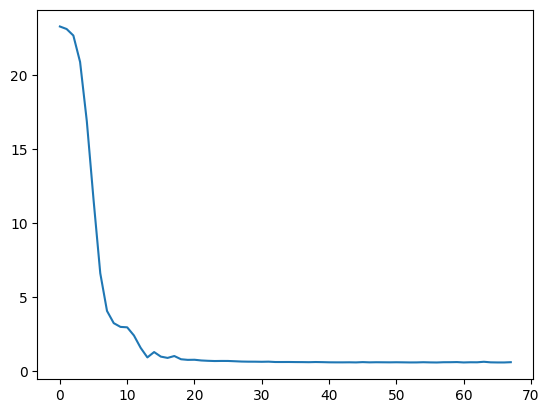

pred:  [0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0
 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0]
y_test:  [0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0
 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0
 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0]
accuracy:  0.7467532467532467


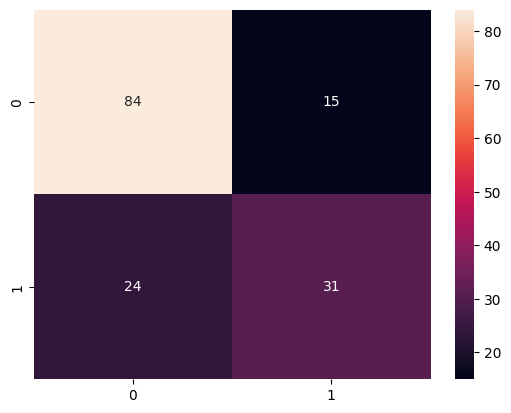

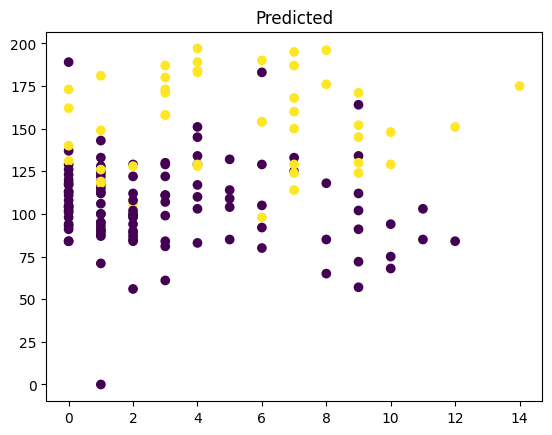

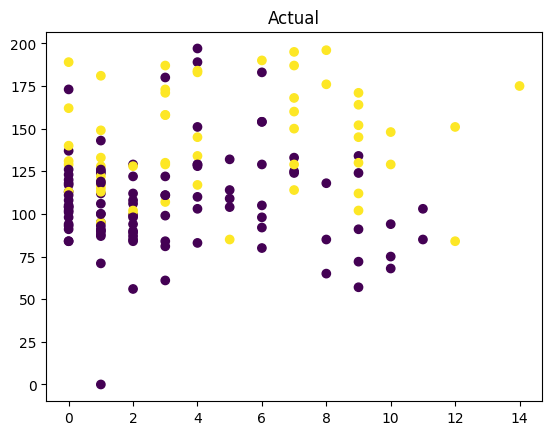

In [10]:
if __name__ == '__main__':
    X = df.iloc[:, :7]
    y = df.iloc[:, 8]
    X = np.array(X)
    y = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=100, alpha=0.0001, tol=0.000000001)
    #clf = MLP(8, 30, None, None)
    clf.fit(X_train, y_train)
    #clf.fit(X_train,Y_train,epochs=100)
    loss = clf.loss_curve_
    # plot loss curve
    import matplotlib.pyplot as plt
    plt.plot(loss)
    plt.show()

    pred = clf.predict(X_test)
    print("pred: ", pred)
    print("y_test: ", y_test)
    acc = np.sum(pred == y_test) / len(y_test)
    print("accuracy: ", acc)
    # plot confusion matrix
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True)
    plt.show()
    # plot scatter plot
    plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
    plt.title("Predicted")
    plt.show()
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
    plt.title("Actual")
    plt.show()